<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
from arcgis.gis import GIS
import secrets

In [3]:
gis = GIS("https://www.arcgis.com", secrets.user, secrets.pw)


In [5]:
user = gis.users.get('mcleverley')
user

<User username:mcleverley>

In [7]:
nyc = gis.map('New York, NY')
nyc

MapView(layout=Layout(height='400px', width='100%'))

In [11]:
from IPython.display import display

items = gis.content.search('New York City')
for item in items:
    display(item)


In [14]:
item = gis.content.get("85d0ca4ea1ca4b9abf0c51b9bd34de2e")
flayer = item.layers[0]
# from tutorial:
# create a Spatially Enabled DataFrame object
sdf = pd.DataFrame.spatial.from_layer(flayer)
sdf.head()

,FID,NAME,CLASS,ST,STFIPS,PLACEFIPS,CAPITAL,POP_CLASS,POPULATION,POP2010,...,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,SHAPE
0,1,Ammon,city,ID,16,1601990,,6,15181,13816,...,1131,106,335,3352,3.61,4747,271,3205,1271,"{""x"": -12462673.723706165, ""y"": 5384674.994080..."
1,2,Blackfoot,city,ID,16,1607840,,6,11946,11899,...,1081,174,381,2958,3.31,4547,318,2788,1441,"{""x"": -12506251.313993266, ""y"": 5341537.793529..."
2,4,Burley,city,ID,16,1611260,,6,10727,10345,...,861,139,358,2499,3.37,3885,241,2183,1461,"{""x"": -12667411.402393516, ""y"": 5241722.820606..."
3,6,Chubbuck,city,ID,16,1614680,,6,14655,13922,...,1281,172,370,3586,3.40,4961,229,3324,1408,"{""x"": -12520053.904151963, ""y"": 5300220.333409..."
4,8,Eagle,city,ID,16,1623410,,6,25825,19908,...,2450,165,398,5585,3.20,7570,501,5770,1299,"{""x"": -12952121.214662466, ""y"": 5418315.320992..."


<Item title:"Landsat 8 Views" type:Imagery Layer owner:esri>
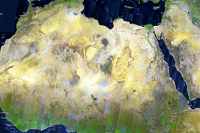

In [15]:
# landsat-8 views
l8_views = gis.content.get('4ca13f0e4e29403fa68c46d188c4be73')
l8_views

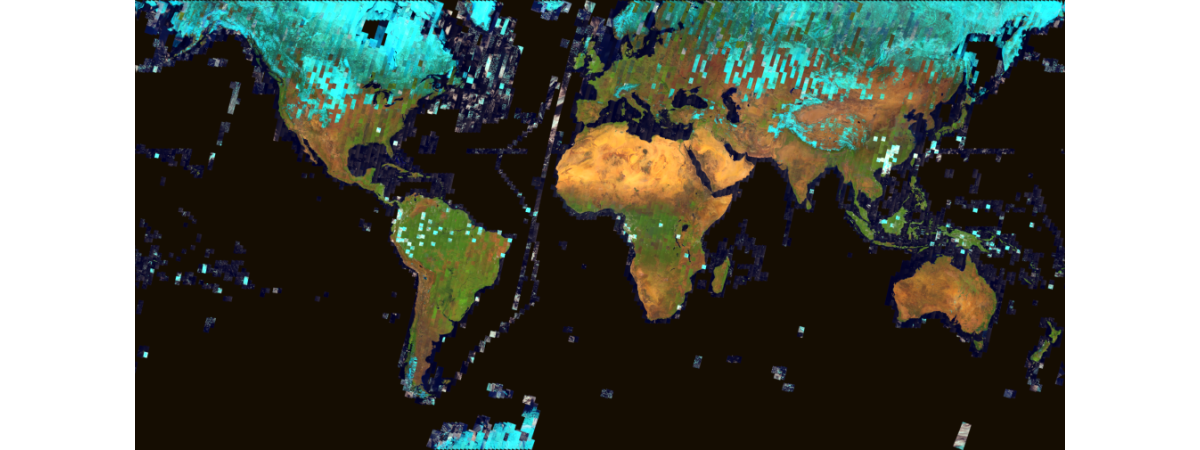

In [16]:
l8_lyr = l8_views.layers[0]
l8_lyr

In [24]:
l8_lyr.properties['description']

'Multispectral Landsat 8 OLI Image Service covering the landmass of the World. This service includes 8-band multispectral scenes, at 30 meter resolution. It can be used for mapping and change detection of agriculture, soils, vegetation health, water-land features and boundary studies. Using on-the-fly processing, the raw DN values are transformed to scaled (0 - 10000) apparent reflectance values and then different service based renderings for band combinations and indices are applied. The service is updated on a daily basis to include the latest best scenes from the USGS.'

In [22]:
l8_views.description

"<p>This layer includes Landsat 8 imagery for use in visualization and analysis. This layer is time enabled and includes a number of band combinations and indices rendered on demand. The imagery includes eight multispectral bands from the Operational Land Imager (OLI) and two bands from the Thermal Infrared Sensor (TIRS).\xa0 It is updated daily with new imagery directly sourced from the\xa0<a href='https://aws.amazon.com/public-datasets/landsat/' rel='nofollow ugc'>Landsat on AWS</a>\xa0collection.<br /></p><p>Geographic Coverage</p><p></p><ul><li>World-wide imagery coverage.<br /></li><li>Polar regions are available in polar-projected Imagery Layers:\xa0\xa0<a href='https://www.arcgis.com/home/item.html?id=6334dd0f09f04a3583a37233540d73c0' rel='nofollow ugc' target='_blank'>Landsat Arctic Views</a>\xa0and\xa0<a href='https://www.arcgis.com/home/item.html?id=c391d600102e48a6bbd82ffe28941bf5' rel='nofollow ugc' target='_blank'>Landsat Antarctic Views</a>.<br /></li></ul><p></p><p>Tempo

In [ ]:
18_lyr

In [25]:
landsat_lyr = l8_lyr

In [26]:
for fn in landsat_lyr.properties.rasterFunctionInfos:
    print(fn['name'])

Agriculture with DRA
Bathymetric with DRA
Color Infrared with DRA
Natural Color with DRA
Short-wave Infrared with DRA
Geology with DRA
Agriculture
Bathymetric
Color Infrared
Geology
Natural Color
Short-wave Infrared
NDVI Colorized
Normalized Difference Moisture Index Colorized
NDVI Raw
NBR Raw
Band 10 Surface Temperature in Fahrenheit
Band 11 Surface Temperature in Fahrenheit
Band 10 Surface Temperature in Celsius
Band 11 Surface Temperature in Celsius
None


In [ ]:
nyc = map = gis.map("Pallikaranai", zoomlevel=13)
map

In [34]:
import time 
from arcgis.raster.functions import apply
nyc = gis.map('Manhattan', zoomlevel=14)
nyc

MapView(layout=Layout(height='400px', width='100%'), zoom=14.0)

In [35]:
for fn in landsat_lyr.properties.rasterFunctionInfos: # cycle through raster functions over our NYC map
    print(fn['name']) # show specific raster name
    nyc.remove_layers()
    nyc.add_layer(apply(landsat_lyr, fn['name'])) # apply raster
    time.sleep(4)

Agriculture with DRA
Bathymetric with DRA
Color Infrared with DRA
Natural Color with DRA
Short-wave Infrared with DRA
Geology with DRA
Agriculture
Bathymetric
Color Infrared
Geology
Natural Color
Short-wave Infrared
NDVI Colorized
Normalized Difference Moisture Index Colorized


KeyboardInterrupt: 

In [36]:
# Search for Feature Layers owned by the logged-in user
my_content = gis.content.search(query='california', 
                                item_type="Feature Layer", 
                                max_items=15)

my_content

[]